# Práctica 3: Regresión logística.

Greta y Héloïse

Grupo 2

# Leer el contenido del archivo

In [1]:
import numpy as np
from pandas.io.parsers import read_csv

In [2]:
datos = read_csv("data3.csv", header=None).to_numpy()
print(datos.shape)
#print(datos[:10])

(100, 3)


# Visualización de los datos

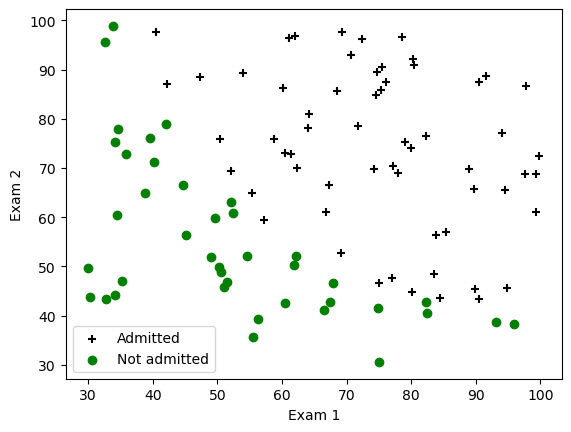

In [12]:
import matplotlib.pyplot as plt

X=datos[:,:-1]
Y=datos[:,-1]
# Obtiene un vector con los indices de los ejemplos positivos
pos1 = np.where(Y == 1 )
pos0 = np.where(Y == 0 )
# Dibuja los ejemplos positivos
plt.scatter (X[pos1,0], X[pos1,1], marker='+', c='k', label="Admitted")
plt.scatter (X[pos0,0], X[pos0,1], marker='o', c='green', label="Not admitted")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend();


## Función sigmoide

In [4]:
import numpy as np
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

## Cálculo de la función de coste y su gradiente

In [5]:
def cost(x,y,w,b):
    m = len(y)
    f_wb = sigmoide(np.dot(x,w)+b)
    sum_L = np.dot(-y, np.log(f_wb)) - np.dot((1 - y), np.log(1 - f_wb))
    J = sum_L / m
    return J

def gradient(x,y,w,b):
    m = len(y)
    n = x.shape[1]
    f_wb = sigmoide(np.dot(x,w)+b)
    grad = (1/m)* (np.dot(f_wb - y),x) 
    return grad

def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

## Método de descenso de gradiente

In [6]:
def gradient_descent(data, alpha, max_iter):
    X, Y = normalize(data[:, :-1])[0],data[:, -1]
    m,n = np.shape(X)
    w, tmp_w = np.zeros(n), np.zeros(n)
    b = 0
    J_history = []
    
    for iter in range(max_iter):
        f_wb = sigmoide(np.dot(X,w)+b)
        dJ_w = np.dot((f_wb - Y), X) / m
        dJ_b = np.sum((f_wb - Y)) / m
        tmp_w = w - alpha * dJ_w
        tmp_b = b - alpha * dJ_b
        w, b = tmp_w, tmp_b
        J_history.append(cost(X, Y, w, b)) 
    return w, b, J_history


## Regrésion logística para el conjunto de datos

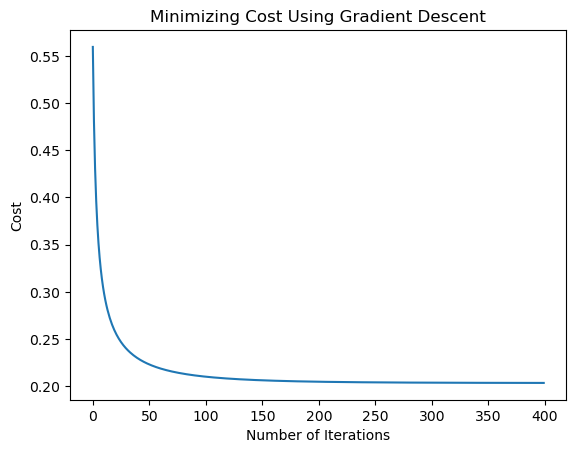

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Gradient Descent Method for Linear Regression
learning_rate, max_iter = 1, 400
w_min, b_min, J_history_min = gradient_descent(datos, learning_rate, max_iter)

# Plot the resulting minimal cost function
plt.plot(J_history_min)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')
plt.show()


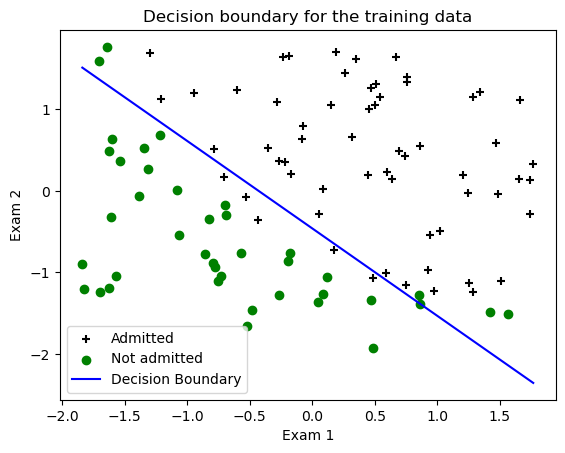

In [15]:
# Plot the normalized data
X, Y = normalize(datos[:, :-1])[0],datos[:, -1]
pos1, pos0 = np.where(Y == 1 ), np.where(Y == 0 )
plt.scatter (X[pos1,0], X[pos1,1], marker='+', c='k', label="Admitted")
plt.scatter (X[pos0,0], X[pos0,1], marker='o', c='green', label="Not admitted")

# Plot the decision boundary
x_val = np.array([np.min(X[:,0]), np.max(X[:,0])])
y_val = - (b_min + w_min[0] * x_val) / w_min[1]
plt.plot(x_val, y_val, 'b', label='Decision Boundary')

plt.title('Decision boundary for the training data')
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend();
plt.show()


In [9]:
def accuracy(X, y, w, b, cutoff):
    pred = [sigmoide(np.dot(X, w) + b) >= cutoff]
    acc = np.mean(pred == y)
    return (acc * 100)

porcentage = accuracy(X, Y, w_min, b_min, 0.5) #89%
print('The accuracy of the classifier is of ',porcentage, '%')

The accuracy of the classifier is of  89.0 %
